In [ ]:
from IPython.display import HTML
from IPython.display import display

from ipywidgets import interactive
import ipywidgets as widgets
from IPython.display import display 
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Tomado de https://stackoverflow.com/questions/31517194/how-to-hide-one-specific-cell-input-or-output-in-ipython-notebook
tag = HTML('''<script>
code_show=false; 
function code_toggle() {
    if (code_show){
        $('div.cell.code_cell.rendered.selected div.input').hide();
    } else {
        $('div.cell.code_cell.rendered.selected div.input').show();
    }
    code_show = !code_show
} 

$( document ).ready(code_toggle);
</script>

Para mostrar/ocultar código presione <a href="javascript:code_toggle()">aquí</a>.''')


def Equilibrio():

    display(tag)
    
    def GraficoInteractivoFuerzasEquilibrio(angulo, masa):
        anguloRadianes = angulo * np.pi / 180
        x = [0, np.cos(anguloRadianes)*10]        
        y = [0, np.sin(anguloRadianes)*10] 
        
        gravedad = 9.81
        
        fPeso = round (masa * gravedad, 2)       
        fNormal = round (fPeso * np.cos (anguloRadianes), 2)
        fFricción = round (fPeso * np.sin (anguloRadianes), 2)
    
        
        fig, ax = plt.subplots (dpi=120)    
        plt.xlim (-3, 10)
        plt.ylim (-7, 10)
        ax.plot (x, y)
        plt.plot (x[1]/2, y[1]/2, marker="o", color="red")
        ax.set_title('Diagrama Cuerpo Libre de un Partícula')  
        
        ax.arrow(x[1]/2, y[1]/2, 0, -fPeso/(masa*3)-fPeso/50, head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2-0.5, y[1]/2-fPeso/(masa*3)-fPeso/50-0.75, "Peso=" + str(fPeso) + "N")
        
        inclinaciónNormalX = -fNormal/(masa*3)*np.sin(anguloRadianes)
        inclinaciónNormalY = fNormal/(masa*3)*np.cos(anguloRadianes)
        
        ax.arrow(x[1]/2, y[1]/2, inclinaciónNormalX+inclinaciónNormalX*masa/50, 
                 inclinaciónNormalY+inclinaciónNormalY*masa/50, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2+inclinaciónNormalX+inclinaciónNormalX*masa/50-1.75, 
                y[1]/2+inclinaciónNormalY+inclinaciónNormalY*masa/50+0.5, "Normal=" + str(fNormal) + "N")
        
        inclinaciónFricciónX = fFricción/(masa*3)*np.cos(anguloRadianes)
        inclinaciónFricciónY = fFricción/(masa*3)*np.sin(anguloRadianes)
        
        ax.arrow(x[1]/2, y[1]/2, inclinaciónFricciónX+inclinaciónFricciónX*masa/50, 
                 inclinaciónFricciónY+inclinaciónFricciónY*masa/50, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2+inclinaciónFricciónX+inclinaciónFricciónX*masa/50+0.25, 
                y[1]/2+inclinaciónFricciónY+inclinaciónFricciónY*masa/50+0.25-1.25, "Fricción=" + str(fFricción) + "N")
        
        
        ax.axis ("off")

        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=0, max=70, step=1, value=45)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])
    
    masaEtiqueta = widgets.Label (value="Masa $(kg)$:")
    masaSlider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
    cajamasa = widgets.HBox([masaEtiqueta, masaSlider])


    salida = widgets.interactive_output(GraficoInteractivoFuerzasEquilibrio, {'angulo':angSlider,
                                                                     'masa':masaSlider})

    display(cajaAngulo, cajamasa, salida)
    

def Dinámica():
    
    display(tag)
    
    def GraficoInteractivoDinámica(angulo, masa):
        anguloRadianes = angulo * np.pi / 180
        x = [0, np.cos(anguloRadianes)*10]        
        y = [0, np.sin(anguloRadianes)*10] 
        
        gravedad = 9.81
        
        aceleración = round (gravedad * np.sin (anguloRadianes), 2)
        fPeso = round (masa * gravedad, 2)       
        fNormal = round (fPeso * np.cos (anguloRadianes), 2)
        
        
        fig, ax = plt.subplots (dpi=120)    
        plt.xlim (-3, 10)
        plt.ylim (-7, 10)
        ax.plot (x, y)
        plt.plot (x[1]/2, y[1]/2, marker="o", color="red")
        ax.set_title('Diagrama Cuerpo Libre de un Partícula')  
        
        ax.arrow(x[1]/2, y[1]/2, 0, -fPeso/(masa*3)-fPeso/50, head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2-0.5, y[1]/2-fPeso/(masa*3)-fPeso/50-0.75, "Peso=" + str(fPeso) + "N")
        
        inclinaciónNormalX = -fNormal/(masa*3)*np.sin(anguloRadianes)
        inclinaciónNormalY = fNormal/(masa*3)*np.cos(anguloRadianes)
        
        ax.arrow(x[1]/2, y[1]/2, inclinaciónNormalX+inclinaciónNormalX*masa/50, 
                 inclinaciónNormalY+inclinaciónNormalY*masa/50, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2+inclinaciónNormalX+inclinaciónNormalX*masa/50-1.75, 
                y[1]/2+inclinaciónNormalY+inclinaciónNormalY*masa/50+0.5, "Normal=" + str(fNormal) + "N")
        
        inclinaciónAceleraciónX = -aceleración/3*np.cos(anguloRadianes)
        inclinaciónAceleraciónY = -aceleración/3*np.sin(anguloRadianes)
        
        ax.arrow(x[1]/2-3.5, y[1]/2+1, inclinaciónAceleraciónX, inclinaciónAceleraciónY, 
                 head_width=0.35, head_length=0.1, fc='k', ec='k')
        ax.text(x[1]/2+inclinaciónAceleraciónX-4.5, y[1]/2+inclinaciónAceleraciónY+0.25, "Aceleración=" + str(aceleración) + "$m/s^2$")
        
        
        ax.axis ("off")

        plt.show()  
        return

    angEtiqueta = widgets.Label (value="Angulo $(°)$:")
    angSlider = widgets.FloatSlider(min=0, max=70, step=1, value=45)
    cajaAngulo = widgets.HBox([angEtiqueta, angSlider])
    
    masaEtiqueta = widgets.Label (value="Masa $(kg)$:")
    masaSlider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
    cajamasa = widgets.HBox([masaEtiqueta, masaSlider])


    salida = widgets.interactive_output(GraficoInteractivoDinámica, {'angulo':angSlider,
                                                                     'masa':masaSlider})

    display(cajaAngulo, cajamasa, salida)
    
    
def Sistema():
    
    display(tag)
    
    def GraficoInteractivoSistema(masa1, masa2):

        x = [0.5, 6, 6]        
        y = [4, 4, 1] 
        
        gravedad = 9.81
        
        aceleración = round (masa2 * gravedad / (masa1 + masa2), 2)
        fPeso1 = round (masa1 * gravedad, 2)
        fPeso2 = round (masa2 * gravedad, 2)
        fTensión = round (masa1 * masa2 * gravedad / (masa1 + masa2), 2)
        fNormal = round (masa1 * gravedad, 2)
           
        fig, ax = plt.subplots (dpi=120)    
        plt.xlim (-1, 7)
        plt.ylim (-1.5, 7)

        
        ax.arrow(0.25, 4, 0, fNormal/(masa1*10)+fNormal/175, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(-1, 4+fNormal/(masa1*10)+fNormal/175+0.25, "Normal=" + str(fNormal) + "N")
        
        ax.arrow(0.25, 4, 0, -fPeso1/(masa1*10)-fPeso1/175, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(-1, 4-fPeso1/(masa1*10)-fPeso1/175-0.5, "Peso=" + str(fPeso1) + "N")
        
        ax.arrow(0.25, 4, 2.5-10/fTensión, 0, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(2.5-10/fTensión, 3.5, "Tensión=" + str(fTensión) + "N")
        
        ax.arrow(3, 4.75, aceleración/5, 0, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(2.75+aceleración/5, 5, "Aceleración=" + str(aceleración) + "$m/s^2$")
        
        ax.arrow(6, 0.75, 0, -fPeso2/(masa2*10)-fPeso2/175, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(5.5, 0.75-fPeso2/(masa2*10)-fPeso2/175-0.5, "Peso=" + str(fPeso2) + "N")
        
        ax.arrow(6, 1, 0, 2.5-10/fTensión, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(6.15,3.5-10/fTensión, "Tensión=" + str(fTensión) + "N")
        
        ax.arrow(5, 1.5, 0, -aceleración/5, head_width=0.15, head_length=0.1, fc='k', ec='k')
        ax.text(1, 1.-aceleración/5, "Aceleración=" + str(aceleración) + "$m/s^2$")
        

        
        ax.set_title('Diagrama Cuerpo Libre de un Partícula')  
        
        #Rectángulo
        ax.add_patch(
            patches.Rectangle((0, 3.75),0.5,0.5,
                facecolor = 'red',fill=True) )
        
        #Círculo
        draw_circle = plt.Circle((6, 4), 0.3, color = "Black")
        ax.set_aspect(1)
        ax.add_artist(draw_circle)
        
        #Triángulo
        trianguloX = [5.75, 6, 6.25]
        trianguloY = [0.5, 1, 0.5]
        plt.fill(trianguloX, trianguloY, '#7FC080')
        
        ax.plot (x, y)
        
        ax.axis ("off")

        plt.show()  
        return

    masa1Etiqueta = widgets.Label (value="Masa 1 $(kg)$:")
    masa1Slider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
    cajamasa1 = widgets.HBox([masa1Etiqueta, masa1Slider])
    
    
    masa2Etiqueta = widgets.Label (value="Masa 2 $(kg)$:")
    masa2Slider = widgets.FloatSlider(min=1, max=10, step=1, value=1)
    cajamasa2 = widgets.HBox([masa2Etiqueta, masa2Slider])

    
    salida = widgets.interactive_output(GraficoInteractivoSistema, {'masa1':masa1Slider,
                                                                     'masa2':masa2Slider})

    display(cajamasa1, cajamasa2, salida)

# Leyes de Newton

## I Ley de Newton

La primera ley de Newton o también conocida como Ley de Inercia. Indica que todo cuerpo permanece en reposo o con un movimiento con velocidad constante a menos que se le aplique una fuerza. Por lo que la ecuación se describe como:

$$
\Sigma \overrightarrow{F} = 0
$$

Esto quiere decir, que la suma de fuerzas, para cada componente, es igual a cero en sistemas inerciales (no acelerados).

Un ejemplo de esta ley es el de una pelota atada a una cuerda en la cual, esta gira siguiendo una trayectoria circular.

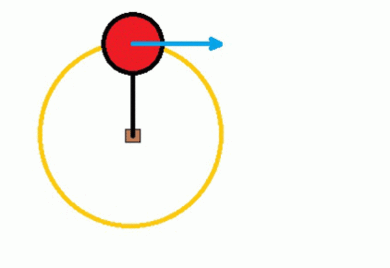

Si en un instante dicha cuerda se rompe, la pelota mantendrá un movimiento rectilíneo uniforme, en la que, en sistema ideales, experimentará una fuerza neta de 0.


## II Ley de Newton

La segunda ley indica que la suma de todas las fuerzas es igual al cambio de la cantidad de movimiento con respecto al tiempo, es decir:

$$
\Sigma \overrightarrow{F} = \dfrac{d \overrightarrow{P}}{dt}
$$

Si la masa estudiada es constante, se establece que la sumatoria de fuerzas es igual a la masa por la aceleración de la partícula, es decir:

$$
\Sigma \overrightarrow{F} = m\overrightarrow{a}
$$

Para este caso se puede tomar como ejemplo el de un objeto en caída libre la cual experimenta una fuerza en el eje vertical igual a la masa del objeto por la gravedad de la Tierra.


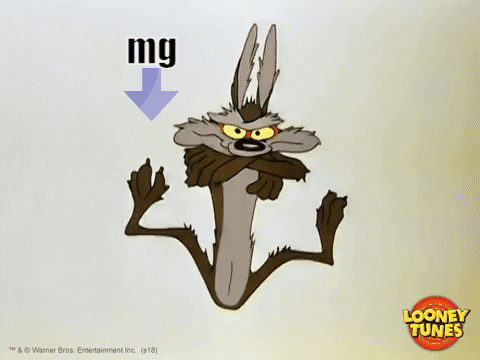

## III Ley de Newton

También conocida como la Ley de Acción Reacción, la tercera ley indica que toda fuerza aplicada sobre un objeto, aplicará una fuerza de la misma magnitud pero con dirección contraria a la fuerza aplicada. Lo cual puede ser descrito como:

$$
F_{12} = F_{21}
$$

Para este caso se puede contemplar la Fuerza Normal como un ejemplo. Debido a que esta fuerza es la reacción de un objeto colocado sobre una superficie.

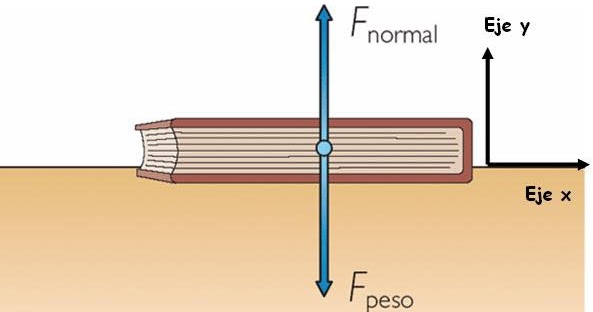

Si la superficie es perpendicular a la fuerza ejercida por el peso, la fuerza normal será igual a esta última, donde:

$$
F_{Normal} = F_{Peso}
$$

## Equilibrio de una partícula

Si se está en presencia de un sistema en el cual la partícula se mantiene en reposo. Se debe utilizar la primera Ley de Newton, para la cual la sumatoria de las fuerzas es igual a 0.

Analizando una masa en un plano, inclinado o no, el cual experimenta una fricción con la superficie. Se obtiene el siguiente diagrama de cuerpo libre.

In [1]:
Equilibrio ()

Output()

## Dinámica de Partículas

Si por el contrario, se está en prescencia de un sistema en donde la partícula experimenta una aceleración, se aplicará la segunda ley de Newton. En donde el diagrama de cuerpo libre para un plano, inclinado o no, es igual a:

In [2]:
Dinámica ()

Output()

Además, utilizando las segunda ley de Newton, se pueden estudiar sistemas como el mostrado en la siguiente imagen:

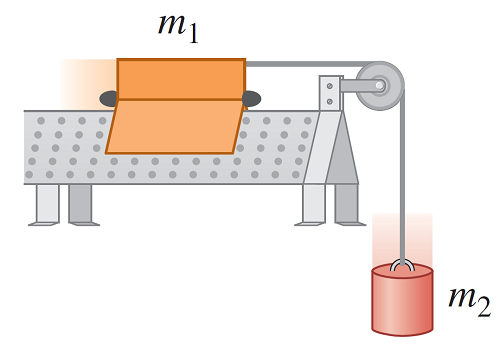

El cual obtiene un diagrama de cuerpo libre igual al siguiente:

In [3]:
Sistema ()

Output()